C:\Users\02ris\AppData\Local\Temp\ipykernel_16544\2829953375.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SubCatDesc'].fillna('Unknown', inplace=True)
C:\Users\02ris\AppData\Local\Temp\ipykernel_16544\2829953375.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

                    Model  Accuracy  Precision    Recall  F1 Score
1     Logistic Regression  0.692771   0.622579  0.692771  0.598423
0           Random Forest  0.608434   0.577758  0.608434  0.588754
4  Support Vector Machine  0.680723   0.496402  0.680723  0.572560
2           Decision Tree  0.566265   0.555372  0.566265  0.552763
3     K-Nearest Neighbors  0.536145   0.489679  0.536145  0.506549


c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\02ris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

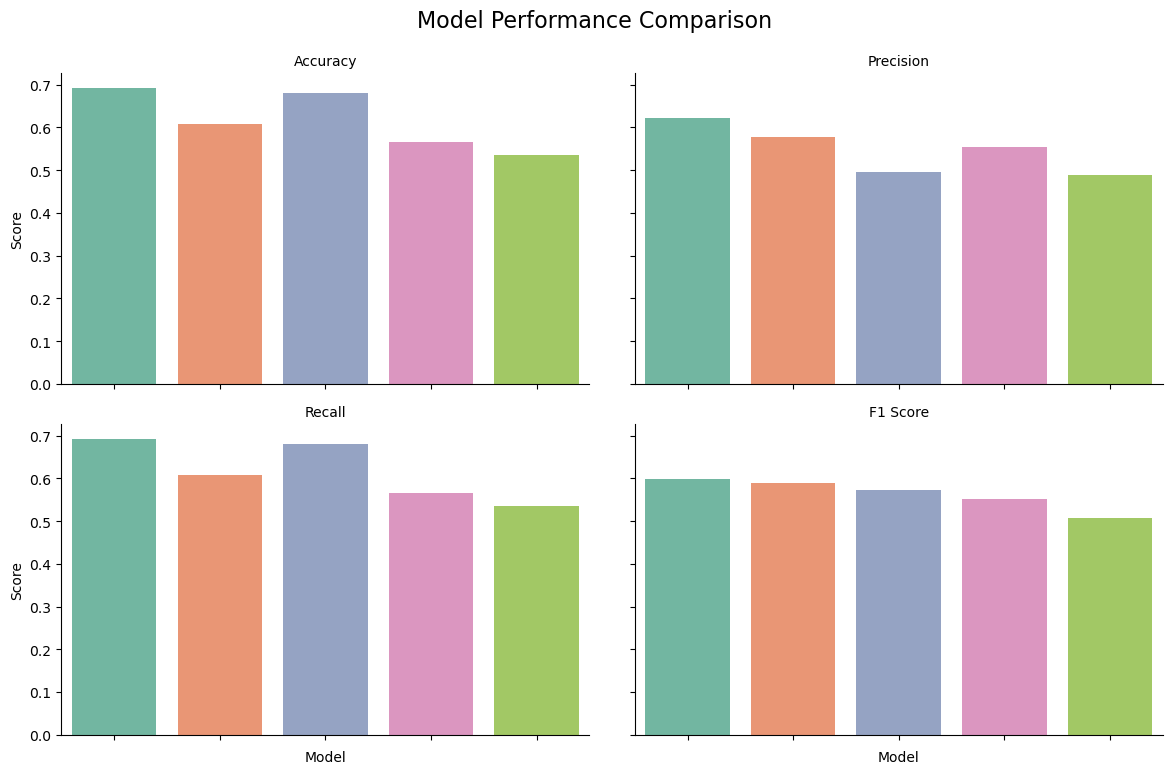

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("C:\\Users\\02ris\\OneDrive\\Desktop\\mtp project related pdf\\Data\\Final_data.csv")

# Handle missing values
data['SubCatDesc'].fillna('Unknown', inplace=True)
data['Reason'].fillna('Unknown', inplace=True)

# Define features and target variable
features = ['DistrictName', 'AccidentTime', 'AccidentPlace', 'Gender', 'CatDesc',
            'SubCatDesc', 'EquipmentName', 'CauseOfAccident', 'Reason', 'AccidentType']
target = 'AIS level'

# Encode categorical features
encoder = LabelEncoder()
for col in features:
    data[col] = encoder.fit_transform(data[col])

# Split the data (stratified to maintain class distribution)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Evaluate models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

# Visualization: Performance Comparison
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
g = sns.FacetGrid(results_melted, col="Metric", col_wrap=2, height=4, aspect=1.5)
g.map(sns.barplot, "Model", "Score", palette="Set2", order=results_df['Model'])
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Model", "Score")
g.set_xticklabels(rotation=30, ha="right", fontsize=10)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Model Performance Comparison', fontsize=16)
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted')
grid_rf.fit(X_train, y_train)

print("Best RF parameters:", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_


Best RF parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Ab model SMOTE data par fit karo:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

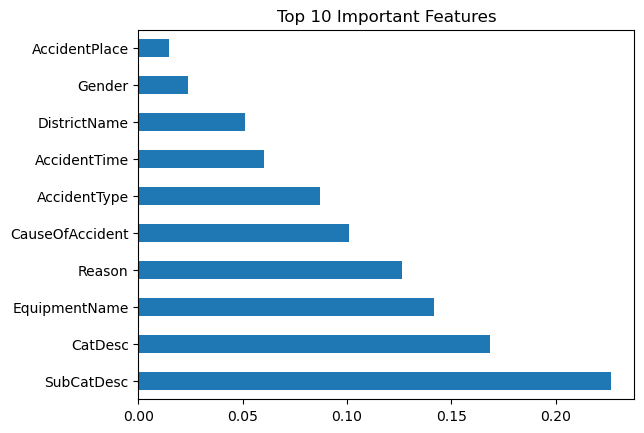

In [6]:
import matplotlib.pyplot as plt

model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(X_train, y_train)

feat_importances = pd.Series(model_rf.feature_importances_, index=features)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [7]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(RandomForestClassifier(n_estimators=200), X_train, y_train, cv=5, scoring='f1_weighted')
print("Cross-validation F1 scores:", cv_scores)
print("Mean CV F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.57994756 0.6142397  0.56700695 0.60360592 0.62810228]
Mean CV F1 score: 0.5985804813812268


In [8]:
from sklearn.ensemble import VotingClassifier

clf1 = RandomForestClassifier(n_estimators=200, random_state=42)
clf2 = LogisticRegression(max_iter=1000, random_state=42)
clf3 = SVC(kernel='linear', probability=True, random_state=42)

ensemble = VotingClassifier(estimators=[
    ('rf', clf1), ('lr', clf2), ('svc', clf3)
], voting='soft')

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)

print("Ensemble F1 Score:", f1_score(y_test, y_pred_ensemble, average='weighted'))


Ensemble F1 Score: 0.5995074698465336


In [9]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE for balancing
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter tuning example (Random Forest)
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf, cv=5, scoring='f1_weighted'
)
grid_rf.fit(X_train_smote, y_train_smote)

# Final best model
final_model = grid_rf.best_estimator_

# Evaluation
y_pred_final = final_model.predict(X_test_scaled)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final Model F1:", f1_score(y_test, y_pred_final, average='weighted'))


Final Model Accuracy: 0.572289156626506
Final Model F1: 0.5634718965275232


In [10]:
data['SubCatDesc'].fillna('Unknown', inplace=True)
data['Reason'].fillna('Unknown', inplace=True)

# Re-encode again clearly with separate LabelEncoders
from sklearn.preprocessing import LabelEncoder

for col in features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])


C:\Users\02ris\AppData\Local\Temp\ipykernel_16544\2215265832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SubCatDesc'].fillna('Unknown', inplace=True)
C:\Users\02ris\AppData\Local\Temp\ipykernel_16544\2215265832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train_scaled, y_train)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Logistic Regression Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid_lr, cv=5, scoring='f1_weighted')
grid_lr.fit(X_resampled, y_resampled)

# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_weighted')
grid_rf.fit(X_resampled, y_resampled)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 15, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='f1_weighted')

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

estimators = [
    ('lr', grid_lr.best_estimator_),
    ('rf', grid_rf.best_estimator_),
    ('svc', SVC(kernel='linear', probability=True, random_state=42))
]

stack_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=5
)

stack_clf.fit(X_resampled, y_resampled)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(C=10, max_iter=5000)),
                               ('rf',
                                RandomForestClassifier(max_depth=15,
                                                       n_estimators=400,
                                                       random_state=42)),
                               ('svc',
                                SVC(kernel='linear', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression())

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_final = stack_clf.predict(X_test_scaled)

print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("Final F1:", f1_score(y_test, y_pred_final, average='weighted'))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_final))


Final Accuracy: 0.5783132530120482
Final F1: 0.571664168035028

Detailed Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.67      0.68        39
           2       0.40      0.40      0.40        20
           3       0.69      0.86      0.77        21
           4       0.62      0.64      0.63        50
           5       0.18      0.15      0.17        26
           6       0.89      0.80      0.84        10

    accuracy                           0.58       166
   macro avg       0.58      0.59      0.58       166
weighted avg       0.57      0.58      0.57       166


Confusion Matrix:
 [[26 12  1  0  0  0]
 [11  8  1  0  0  0]
 [ 0  0 18  2  1  0]
 [ 0  0  3 32 15  0]
 [ 0  0  3 18  4  1]
 [ 0  0  0  0  2  8]]


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # retain 95% variance
X_train_pca = pca.fit_transform(X_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Then again train the stacking classifier on PCA data:
stack_clf.fit(X_train_pca, y_resampled)
y_pred_pca = stack_clf.predict(X_test_pca)

print("PCA-Enhanced F1 Score:", f1_score(y_test, y_pred_pca, average='weighted'))


PCA-Enhanced F1 Score: 0.5799534012449614
